In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

27518     103000.0
115988     94000.0
683790    115000.0
139633     90000.0
20635     115000.0
121000    125000.0
111459     78000.0
699743    115000.0
271393    124500.0
619984     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

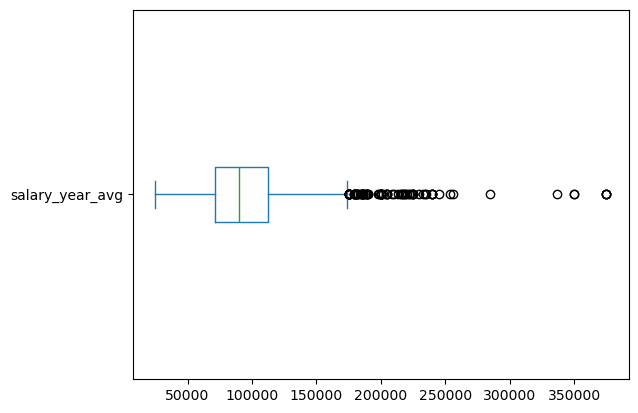

In [8]:
df_DA_US['salary_year_avg'].plot(kind='box', vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae445e13d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae445e19a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae43ce2300>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae445e1fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae445e22a0>],
 'means': []}

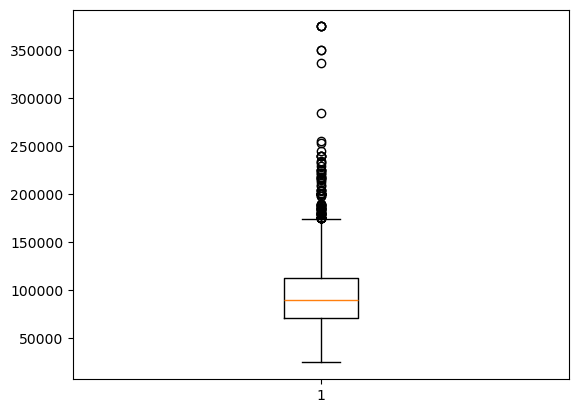

In [6]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\brand\AppData\Local\Temp\ipykernel_3540\1846845645.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


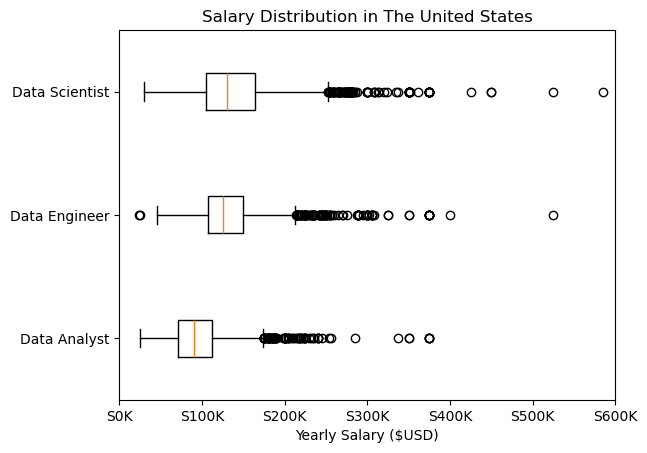

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US =df_US.dropna(subset=['salary_year_avg'])


job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in The United States")
plt.xlabel('Yearly Salary ($USD)')
ax= plt.gca()
plt.xlim(0, 600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'S{int(x/1000)}K'))
plt.show()

In [26]:
#df_US['job_title_short'].value_counts()
#df_US['salary_year_avg']

job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64